# Example: In-training validation
---------------------------------

This example shows how to keep track of the model's performance during training.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [3]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [4]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [5]:
# Initialize atom
atom = ATOMClassifier(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Memory: 138.96 kB
Scaled: False
Outlier values: 169 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   212 (1.0) |   170 (1.0) |    42 (1.0) |
| 1 |   357 (1.7) |   286 (1.7) |    71 (1.7) |



In [9]:
# Not all models support in-training validation
# You can chek which ones do using the available_models method
df = atom.available_models()[["acronym", "model", "has_validation"]]
df[df["has_validation"]]

,acronym,model,has_validation
3,CatB,CatBoost,True
15,LGB,LightGBM,True
19,MLP,MultiLayerPerceptron,True
21,PA,PassiveAggressive,True
22,Perc,Perceptron,True
27,SGD,StochasticGradientDescent,True
29,XGB,XGBoost,True


In [11]:
# Run the models normally
atom.run(models=["MLP", "LGB"], metric="auc")


Training ========================= >>
Models: MLP, LGB
Metric: roc_auc


Results for MultiLayerPerceptron:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 0.9999
Test evaluation --> roc_auc: 0.997
Time elapsed: 1.522s
-------------------------------------------------
Total time: 1.522s


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> roc_auc: 1.0
Test evaluation --> roc_auc: 0.9893
Time elapsed: 0.275s
-------------------------------------------------
Total time: 0.275s


Final results ==================== >>
Total time: 1.797s
-------------------------------------
MultiLayerPerceptron --> roc_auc: 0.997 !
LightGBM             --> roc_auc: 0.9893


## Analyze the results

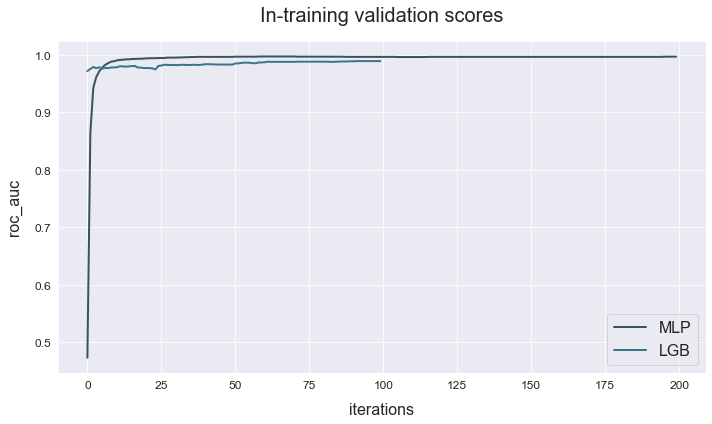

In [12]:
atom.plot_evals(title="In-training validation scores")

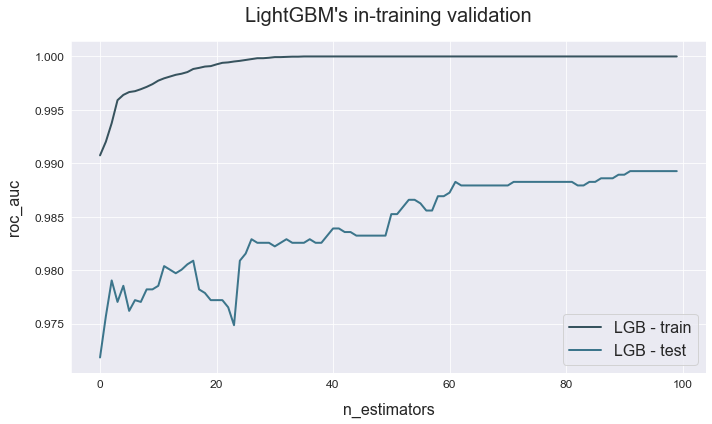

In [15]:
# Plot the validation on the train and test set
atom.lgb.plot_evals(dataset="both", title="LightGBM's in-training validation")
